In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import Normalizer
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import iqr
from statsmodels.formula.api import ols
from sklearn.preprocessing import MinMaxScaler

In [91]:
dataframe=pd.read_excel('../Data/CCPP/Folds5x2_pp.xlsx')
dataframe

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


                                                   1. (b)

There are 9568 rows and 5 columns. The columns represent features like Temperature (AT), Ambient Pressure (AP),
Relative Humidity (RH) and Exhaust Vacuum (V) which are the hourly average of the variables to predict the net hourly electrical energy output (PE) of the plant.

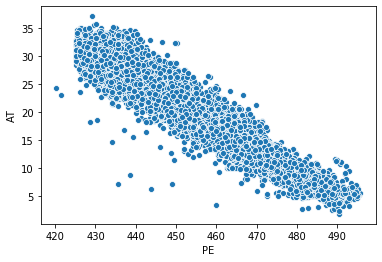

In [47]:
#To obtain pairwise scatterplots
sns.scatterplot(x='PE',y='AT',data=dataframe)

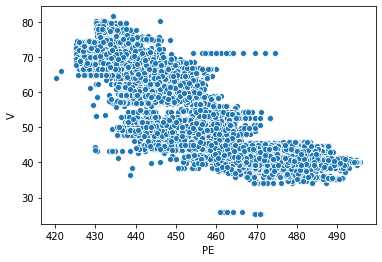

In [48]:
sns.scatterplot(x='PE',y='V',data=dataframe)

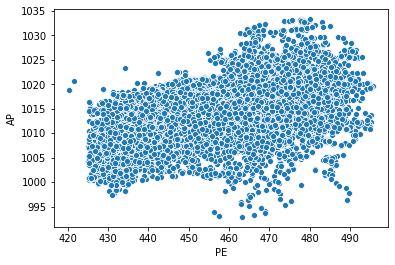

In [49]:
sns.scatterplot(x='PE',y='AP',data=dataframe)

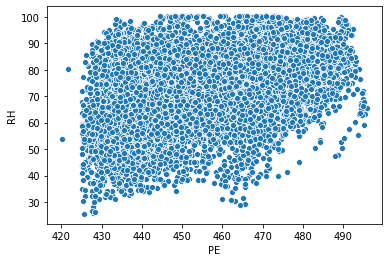

In [50]:
sns.scatterplot(x='PE',y='RH',data=dataframe)

In the above scatterplots, for PE vs AT and PE vs V, we can see that there is a negative correlation between
them. As PE increases, the AT value decreases and the same for PE and V. Next, for PE and AP, there is a positive correlation and it is non-linear. For the last plot (PE vs RH), we can see that it is non-linear. 

In [51]:
#TO find the mean, the median, range, first and third quartiles, and in-terquartile ranges 
#of each of the variables in the dataset
dataframe.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [52]:
#Interquartile range is - 
#75%-25% - This is the middle 50% and is known as IQR
iqr(dataframe['AT'])

12.209999999999999

In [53]:
iqr(dataframe['AP'])

8.159999999999968

In [54]:
iqr(dataframe['V'])

24.800000000000004

In [55]:
iqr(dataframe['RH'])

21.502499999999998

In [56]:
iqr(dataframe['PE'])

28.680000000000007

                                               1. (c)

In [57]:
newframe=dataframe
x=newframe.drop(columns='PE')
y=dataframe['PE']
#features
x

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62
...,...,...,...,...
9563,16.65,49.69,1014.01,91.00
9564,13.19,39.18,1023.67,66.78
9565,31.32,74.33,1012.92,36.48
9566,24.48,69.45,1013.86,62.39


In [58]:
#Independent Linear Regression AT versus PE
X1=dataframe['AT']
Y1=dataframe['PE']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:57:00   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.000     496.727     497.341
AT            -2.1713      0.007   -291.715      0.000      -2.186      -2.157
==============================================================================
Omnibus:                      417.457   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1117.844
Skew:                          -0.209   Prob(JB):                    1.83e-243
Kurtosis:                       4.621   Cond. No.                         59.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

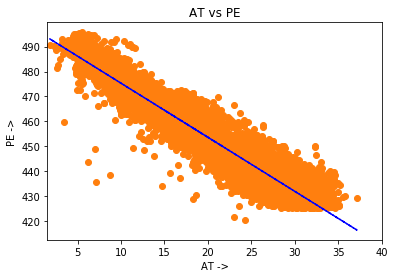

In [59]:
X1=sm.add_constant(X1)
reg_mod=sm.OLS(Y1,X1).fit()
plt.xlim(1.5,40)
plt.plot(X1,Y1,'o')
plt.plot(X1,reg_mod.fittedvalues,'b--')
plt.title('AT vs PE')
plt.xlabel('AT ->')
plt.ylabel('PE ->')
reg_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:57:00   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.000     517.061     518.542
V             -1.1681      0.007   -172.402      0.000      -1.181      -1.155
==============================================================================
Omnibus:                       77.693   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.571
Skew:                          -0.097   Prob(JB):                     1.61e-24
Kurtosis:                       3.487   Cond. No.                         245.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

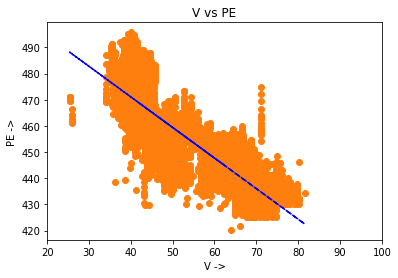

In [60]:
X2=dataframe['V']
X2=sm.add_constant(X2)
reg_mod2=sm.OLS(Y1,X2).fit()
plt.xlim(20,100)
plt.plot(X2,Y1,'o')
plt.plot(X2,reg_mod2.fittedvalues,'b--')
plt.title('V vs PE')
plt.xlabel('V ->')
plt.ylabel('PE ->')
reg_mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:57:00   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.000   -1105.167   -1005.355
AP             1.4899      0.025     59.296      0.000       1.441       1.539
==============================================================================
Omnibus:                      525.438   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.290
Skew:                           0.616   Prob(JB):                    1.10e-133
Kurtosis:                       2.859   Cond. No.                     1.73e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

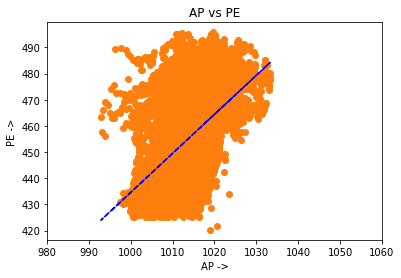

In [61]:
X3=dataframe['AP']
X3=sm.add_constant(X3)
reg_mod3=sm.OLS(Y1,X3).fit()
plt.xlim(980,1060)
plt.plot(X3,Y1,'o')
plt.plot(X3,reg_mod3.fittedvalues,'b--')
plt.title('AP vs PE')
plt.xlabel('AP ->')
plt.ylabel('PE ->')
reg_mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:57:01   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.000     419.349     422.574
RH             0.4557      0.011     41.399      0.000       0.434       0.477
==============================================================================
Omnibus:                      772.278   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.245
Skew:                           0.231   Prob(JB):                     4.75e-70
Kurtosis:                       2.234   Cond. No.                         383.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

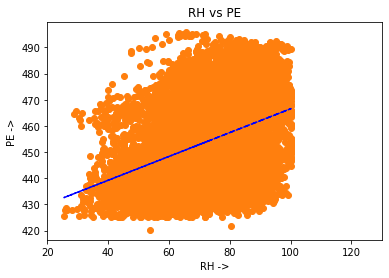

In [62]:
X4=dataframe['RH']
X4=sm.add_constant(X4)
reg_mod4=sm.OLS(Y1,X4).fit()
plt.plot(X4,Y1,'o')
plt.xlim(20, 130)
plt.plot(X4,reg_mod4.fittedvalues,'b--')
plt.title('RH vs PE')
plt.xlabel('RH ->')
plt.ylabel('PE ->')
reg_mod4.summary()

 To show the outliers, we make use of boxplots. This will indicate the outliers that we can remove. 

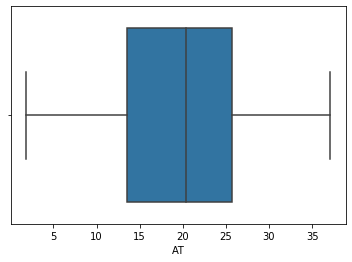

In [63]:
sns.boxplot(dataframe['AT'])

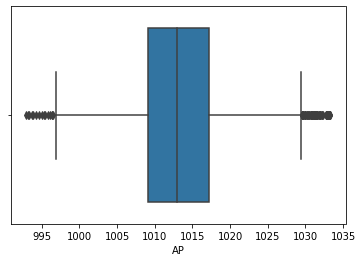

In [64]:
sns.boxplot(dataframe['AP'])

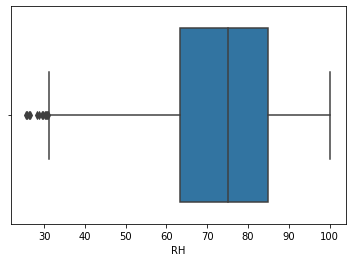

In [65]:
sns.boxplot(dataframe['RH'])

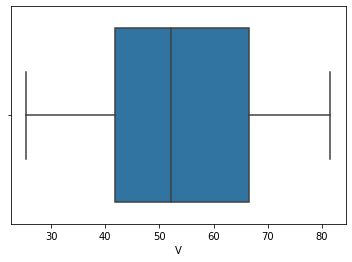

In [66]:
sns.boxplot(dataframe['V'])

From the above, we can see that, in the case of AP and RH, there are outliers. 
For AP, the outliers lie between 1030-1035 and 990 to 1000.
For RH, the outliers lie between 20 - 30 and they can be removed. Here I have performed univariate analysis using boxplot to figure of the outliers. 

Also, for each of the predictors - AT,V,AP,RH, all are statistically significant as p values are less than 0.05.

                                                  1.(d)

In [67]:
x=sm.add_constant(x)
reg_mod5=sm.OLS(Y1,x).fit()
reg_mod5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:57:02   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.000     435.500     473.718
AT            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
V             -0.2339      0.007    -32.122      0.000      -0.248      -0.220
AP             0.0621      0.009      6.564      0.000       0.044       0.081
RH            -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

               Describe your results. For which predictors can we reject the null hypothesis?
    Solution: The t cut-off point is - 1.97 for our dataset which was obtained from the t table. Now, when we 
    look at the t values for our variables, we see that it is lesser than -1.97 or greater than 1.97 
    for all the predictors. Therefore, we can reject the null hypothesis can be rejected for all predictors. 

                                                   1. (e)

In [68]:
#coefficients for univariate linear regression
#in the order - [AT,V,AP,RH]
coeff_list=[-2.1713,-1.1681,1.4899,0.4557]
coeff_list
coeff=[-1.977513,-0.233916, 0.062083,-0.158054]

Text(0, 0.5, 'Multivariate Coefficients')

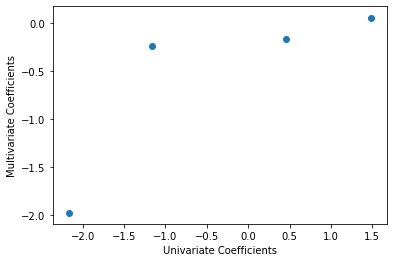

In [69]:
plt.scatter(coeff_list,coeff)
plt.xlabel('Univariate Coefficients')
plt.ylabel('Multivariate Coefficients')

                                                  1. (f)

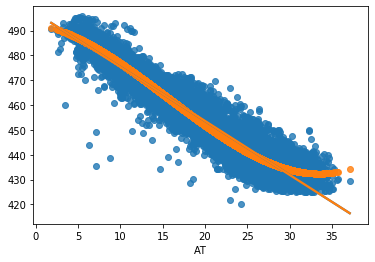

In [70]:
#Y = b0*0 + b1*X + b2*X2 + b3*X3 + c
#AT and PE
poly = PolynomialFeatures(3)
X1=sm.add_constant(X1)
X1=poly.fit_transform(X1)
reg_model=sm.OLS(Y1,X1).fit()
sns.regplot(x='AT',y='PE',data=dataframe)
sns.regplot(x='AT',y=reg_model.fittedvalues,data=dataframe)

In [90]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:12:23   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        123.1820      0.168    732.248      0.000     122.852     123.512
x1           123.1820      0.168    732.248      0.000     122.852     123.512
x2            -0.2034      0.041     -4.941      0.000      -0.284      -0.123
x3           123.1820      0.168    732.248      0.000     122.852     123.512
x4            -0.2034      0.041     -4.941      0.000      -0.284      -0.123
x5            -0.0626      0.003    -18.199      0.000      -0.069      -0.056
x6           123.1820      0.168    732.248      0.000     122.852     123.512
x7            -0.2034      0.041     -4.941      0.000      -0.284      -0.123
x8            -0.0626      0.003    -18.199      0.000      -0.069      -0.056
x9             0.0027      0.000     22.594      0.000       0.002       0.003
==============================================================================
Omnibus:                      648.041   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2767.059
Skew:                          -0.191   Prob(JB):                         0.00
Kurtosis:                       5.607   Cond. No.                     7.35e+35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.69e-60. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

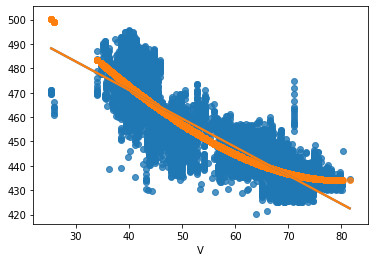

In [71]:
# V and PE
X2=sm.add_constant(X2)
X2=poly.fit_transform(X2)
reg_model2=sm.OLS(Y1,X2).fit()
sns.regplot(x='V',y='PE',data=dataframe)
sns.regplot(x='V',y=reg_model2.fittedvalues,data=dataframe)

In [89]:
reg_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:11:57   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        138.5367      2.288     60.557      0.000     134.052     143.021
x1           138.5367      2.288     60.557      0.000     134.052     143.021
x2            -0.7148      0.170     -4.214      0.000      -1.047      -0.382
x3           138.5367      2.288     60.557      0.000     134.052     143.021
x4            -0.7148      0.170     -4.214      0.000      -1.047      -0.382
x5            -0.0014      0.005     -0.294      0.768      -0.010       0.008
x6           138.5367      2.288     60.557      0.000     134.052     143.021
x7            -0.7148      0.170     -4.214      0.000      -1.047      -0.382
x8            -0.0014      0.005     -0.294      0.768      -0.010       0.008
x9             0.0001   5.45e-05      2.465      0.014    2.75e-05       0.000
==============================================================================
Omnibus:                      160.101   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.778
Skew:                          -0.125   Prob(JB):                     1.77e-61
Kurtosis:                       3.800   Cond. No.                     1.83e+36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.42e-58. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

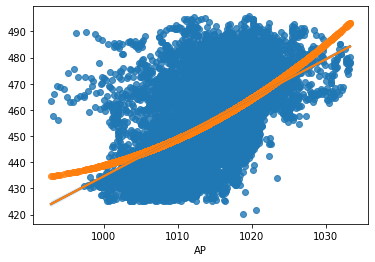

In [72]:
#AP and PE
X3=sm.add_constant(X3)
X3=poly.fit_transform(X3)
reg_model3=sm.OLS(Y1,X3).fit()
sns.regplot(x='AP',y='PE',data=dataframe)
sns.regplot(x='AP',y=reg_model3.fittedvalues,data=dataframe)

In [88]:
reg_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:11:43   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0249      0.003      8.415      0.000       0.019       0.031
x1             0.0249      0.003      8.415      0.000       0.019       0.031
x2             8.4185      1.000      8.415      0.000       6.457      10.380
x3             0.0249      0.003      8.415      0.000       0.019       0.031
x4             8.4185      1.000      8.415      0.000       6.457      10.380
x5            -0.0250      0.003     -8.439      0.000      -0.031      -0.019
x6             0.0249      0.003      8.415      0.000       0.019       0.031
x7             8.4185      1.000      8.415      0.000       6.457      10.380
x8            -0.0250      0.003     -8.439      0.000      -0.031      -0.019
x9          2.514e-05   2.92e-06      8.613      0.000    1.94e-05    3.09e-05
==============================================================================
Omnibus:                      556.766   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              640.319
Skew:                           0.621   Prob(JB):                    9.05e-140
Kurtosis:                       2.751   Cond. No.                     1.13e+40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.08e-59. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:57:11   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.000     419.349     422.574
RH             0.4557      0.011     41.399      0.000       0.434       0.477
==============================================================================
Omnibus:                      772.278   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.245
Skew:                           0.231   Prob(JB):                     4.75e-70
Kurtosis:                       2.234   Cond. No.                         383.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

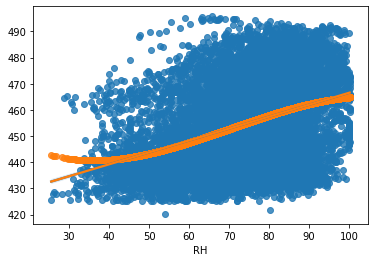

In [73]:
#RH and PE
X4=sm.add_constant(X4)
X4=poly.fit_transform(X4)
reg_model4=sm.OLS(Y1,X4).fit()
sns.regplot(x='RH',y='PE',data=dataframe)
sns.regplot(x='RH',y=reg_model4.fittedvalues,data=dataframe)
reg_mod4.summary()

According to the plot, we can observe that, for AP vs PE, the non-linear association is evident compared to the 
other predictors. 

                                                  1. (g)

In [74]:
new_mod7=ols("PE ~ RH*V + AP*V + AP*RH + AT*AP + AT*RH + AT*V", data=dataframe).fit()
new_mod7.summary()
#able = sm.stats.anova_lm(new_mod7,typ=2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:57:11   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.000     531.631     839.934
RH             1.5709      0.773      2.031      0.042       0.055       3.087
V             -7.6749      1.351     -5.682      0.000     -10.323      -5.027
RH:V           0.0008      0.000      1.716      0.086      -0.000       0.002
AP            -0.1524      0.077     -1.983      0.047      -0.303      -0.002
AP:V           0.0068      0.001      5.135      0.000       0.004       0.009
AP:RH         -0.0016      0.001     -2.125      0.034      -0.003      -0.000
AT            -4.3470      2.373     -1.832      0.067      -8.999       0.305
AT:AP          0.0018      0.002      0.752      0.452      -0.003       0.006
AT:RH         -0.0052      0.001     -6.444      0.000      -0.007      -0.004
AT:V           0.0210      0.001     23.338      0.000       0.019       0.023
==============================================================================
Omnibus:                     1454.609   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9170.848
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                       7.657   Cond. No.                     1.70e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


               Answer - AT-RH,AT-V,AP-RH, AP-V are all the interaction terms that are statistically significant
               as their p value is less than 0.05.

                                                  1. (h)

In [75]:
#Train model using random selection of 70% of data
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3)
train_x=sm.add_constant(train_x)
model_split=sm.OLS(train_y,train_x).fit()
test_x=sm.add_constant(test_x)
prediction=model_split.predict(test_x)
#test MSE
test_mse=mean_squared_error(test_y,prediction)
model_split.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.191e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:57:12   Log-Likelihood:                -19640.
No. Observations:                6697   AIC:                         3.929e+04
Df Residuals:                    6692   BIC:                         3.932e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        455.5264     11.623     39.193      0.000     432.742     478.311
AT            -1.9708      0.018   -108.699      0.000      -2.006      -1.935
V             -0.2371      0.009    -27.426      0.000      -0.254      -0.220
AP             0.0612      0.011      5.424      0.000       0.039       0.083
RH            -0.1572      0.005    -31.830      0.000      -0.167      -0.148
==============================================================================
Omnibus:                      788.247   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4274.213
Skew:                          -0.436   Prob(JB):                         0.00
Kurtosis:                       6.816   Cond. No.                     2.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
#train MSE
prediction_2=model_split.predict(train_x)
train_mse=mean_squared_error(train_y,prediction_2)
train_mse

20.641197634446744

In [77]:
test_mse

21.064430673025345

In [78]:
#run a regression model involving all possible interaction terms and quadratic nonlinearities,
#and remove insignificant variables using p-values
new_df=dataframe
new_df['AT^2']=dataframe['AT']*dataframe['AT']
new_df['V^2']=dataframe['V']*dataframe['V']
new_df['AP^2']=dataframe['AP']*dataframe['AP']
new_df['RH^2']=dataframe['RH']*dataframe['RH']
new_df['AP*AT']=dataframe['AP']*dataframe['AT']
new_df['AP*RH']=dataframe['AP']*dataframe['RH']
new_df['AP*V']=dataframe['AP']*dataframe['V']
new_df['V*RH']=dataframe['V']*dataframe['RH']
new_df['RH*AT']=dataframe['RH']*dataframe['AT']
new_df['V*AT']=dataframe['V']*dataframe['AT']
new_df=new_df.drop(columns='PE')
#ew_df=new_df.drop(columns='APtimes AT')
new_df
new_y=dataframe['PE']
reg_train,reg_test,reg1_train,reg1_test=train_test_split(new_df,new_y,test_size=0.3)
#train_x, test_x, train_y, test_y

reg_train=sm.add_constant(reg_train)
n_model=sm.OLS(reg1_train,reg_train).fit()
reg_test=sm.add_constant(reg_test)
prediction12=n_model.predict(reg_test)
#test MSE
test_mse12=mean_squared_error(reg1_test,prediction12)
test_mse12

19.492191477325115

In [79]:
#train MSE
prediction13=n_model.predict(reg_train)
test_mse13=mean_squared_error(reg1_train,prediction13)
test_mse13

17.532678588530956

In [80]:
n_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     7420.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:57:12   Log-Likelihood:                -19093.
No. Observations:                6697   AIC:                         3.822e+04
Df Residuals:                    6682   BIC:                         3.832e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7701.8591   1395.986     -5.517      0.000   -1.04e+04   -4965.281
AT            -7.6379      3.601     -2.121      0.034     -14.697      -0.579
V             -1.2089      1.755     -0.689      0.491      -4.650       2.232
AP            15.9120      2.707      5.878      0.000      10.606      21.218
RH             4.5569      1.036      4.399      0.000       2.526       6.588
AT^2           0.0152      0.004      4.104      0.000       0.008       0.022
V^2           -0.0013      0.001     -1.375      0.169      -0.003       0.001
AP^2          -0.0077      0.001     -5.865      0.000      -0.010      -0.005
RH^2          -0.0021      0.000     -6.657      0.000      -0.003      -0.001
AP*AT          0.0051      0.003      1.444      0.149      -0.002       0.012
AP*RH         -0.0042      0.001     -4.210      0.000      -0.006      -0.002
AP*V           0.0007      0.002      0.431      0.667      -0.003       0.004
V*RH           0.0008      0.001      0.962      0.336      -0.001       0.002
RH*AT         -0.0076      0.002     -4.310      0.000      -0.011      -0.004
V*AT           0.0127      0.003      3.853      0.000       0.006       0.019
==============================================================================
Omnibus:                      755.419   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3718.622
Skew:                          -0.441   Prob(JB):                         0.00
Kurtosis:                       6.542   Cond. No.                     2.81e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
#Removing, AT, V^2, AP*AT, V*RH
new_df1=new_df
new_df1=new_df.drop(columns='V')
new_df1=new_df.drop(columns='V^2')
new_df1=new_df.drop(columns='AP*V')
new_df1=new_df.drop(columns='V*RH')

reg_train11,reg_test11,reg_train12,reg_test12=train_test_split(new_df1,new_y,test_size=0.3)
#train_x, test_x, train_y, test_y

reg_train11=sm.add_constant(reg_train11)
n1_model=sm.OLS(reg_train12,reg_train11).fit()
reg_test11=sm.add_constant(reg_test11)
prediction15=n1_model.predict(reg_test11)
#test MSE
test_mse15=mean_squared_error(reg_test12,prediction15)
test_mse15

19.004391224969716

In [82]:
#train MSE
prediction16=n1_model.predict(reg_train11)
test_mse16=mean_squared_error(reg_train12,prediction16)
test_mse16

17.730201459459476

Removing AT, V^2, AP times AT, V times RH as the  p values are greater than 0.05.

Now, before removing these terms, obtained train and test MSE's as- 
1. Train MSE - 17.532678588530956
2. Test MSE- 19.492191477325115

After removing the above terms, the train and test MSE's are - 
1. Train MSE- 17.730201459459476
2. Test MSE- 19.004391224969716

Here, the test MSE decreases and the train MSE increases after removing insiginificant terms.

                                               1.(i)

In [83]:
#knn regressor using raw features
knn = KNeighborsRegressor(n_neighbors=5)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
knn.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [84]:
print(knn.predict(x_test))

[449.66  462.276 472.88  ... 440.586 490.172 462.414]


In [94]:
#For normalized data
scaler = MinMaxScaler()
x11_train, x11_test, y11_train, y11_test = train_test_split(x, y, test_size = 0.3)
scaled_train=scaler.fit_transform(x11_train)
scaled_test=scaler.transform(x11_test)
knn_scaled=KNeighborsRegressor(n_neighbors=5)

The optimal k value is:  4
The min error is:  13.885936822971086


Text(0.5, 1.0, 'For Normalized data, 1/k vs MSE')

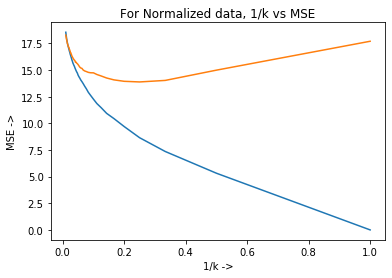

In [95]:
test_array7=[]
train_array7=[]
k_val=np.arange(1,101,1)
min_error7 = 50
min_k7=-7
for k in range(1,101,1):
    knn7=KNeighborsRegressor(k)
    knn7.fit(scaled_train,y11_train)
    prediction7=knn7.predict(scaled_test)
    score_test7=mean_squared_error(y11_test, prediction7)
    test_array7.append(score_test7)
    prediction_train7=knn7.predict(scaled_train)
    score_train7=mean_squared_error(y11_train, prediction_train7)
    train_array7.append(score_train7)
    if min_error7 > score_test7:
            min_error7=score_test7
            min_k7=k
print("The optimal k value is: ", min_k7)
print("The min error is: ",min_error7)
plt.plot((1/k_val),train_array7)
plt.plot((1/k_val),test_array7)
plt.xlabel('1/k ->')
plt.ylabel('MSE ->')
plt.title("For Normalized data, 1/k vs MSE")

The optimal k value is:  6
The min error is:  15.727311359766238


Text(0.5, 1.0, 'For Regular data, 1/k vs MSE')

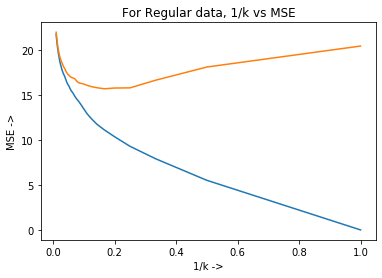

In [96]:
test_array6=[]
train_array6=[]
k_val6=np.arange(1,101,1)
min_error6 = 50
min_k6=-2
for k in range(1,101,1):
    knn6=KNeighborsRegressor(k)
    knn6.fit(x_train,y_train)
    prediction6=knn6.predict(x_test)
    score_test6=mean_squared_error(y_test, prediction6)
    test_array6.append(score_test6)
    prediction_train6=knn6.predict(x_train)
    score_train6=mean_squared_error(y_train, prediction_train6)
    train_array6.append(score_train6)
    if min_error6 > score_test6:
            min_error6=score_test6
            min_k6=k
print("The optimal k value is: ", min_k6)
print("The min error is: ",min_error6)
plt.plot((1/k_val6),train_array6)
plt.plot((1/k_val6),test_array6)
plt.xlabel('1/k ->')
plt.ylabel('MSE ->')
plt.title("For Regular data, 1/k vs MSE")

                                                      1. (j)

Compare the results of KNN Regression with the linear regression model that has
the smallest test error and provide your analysis.

Solution: Lowest test error for KNN Regression - 13.8859
Lowest test error for Linear Regression - 19.004

From this, we can say that, the KNN Regression provides better results compared to Linear Regression.

                                                    ISLR: 2.4.1
  1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.
  
  a. The sample size n is extremely large, and the number of predictors p is small.
 
  Solution: When the number of predictors is less for a large n it is better if the method is inflexible as a more flexible       method might give inaccurate results due to the less number of predictors. 
  
  b. The number of predictors p is extremely large, and the number of observations n is small.
  
  Solution: In this case, a flexible method will give us better performance as the number of predictors is large. 
  
  c. The relationship between the predictors and response is highly non-linear.
  
  Solution: If a model is flexible, it can better fit on the train data. If the model is inflexible, it may not be able to 
  fit properly on non-linear relation between predictors and response. Thereby, it is better if the model is flexible in this
  given situation.
  
  d.  The variance of the error terms, i.e. σ2 = Var(), is extremely high.
      
  Solution: In this situation, if the model is flexible, there are chances that the model will well fit the high variance         of the error term as well. Hence, it is better if the model is inflexible in this case.


                                                    ISLR: 2.4.7
   a. Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.
   
   Solution: 
   Distance between (0,0,0) to (0,3,0) = sqrt(9) = 3 (RED)
   
   Distance between (0,0,0) to (2,0,0) = sqrt(4) = 2 (RED)
   
   Distance between (0,0,0) to (0,1,3) = sqrt(10) = 3.162 (RED)
   
   Distance between (0,0,0) to (0,1,2) = sqrt(5)  = 2.236 (GREEN)
   
   Distance between (0,0,0) to (-1,0,1) = sqrt(2) = 1.414 (GREEN)
   
   Distance between (0,0,0) to (1,1,1) = sqrt(3)= 1.732  (RED)
   
   b. What is our prediction with K = 1? Why?
   
   Solution: For this, the closest neighbor has the least distance of 1.414, thereby, we can expect it to be GREEN. 
   
   c. What is our prediction with K = 3? Why?
   
   Solution: For K=3, the three closest points have the distance, 1.414,1.732,2. Here, the majority is red, hence,
   we can predict it to be RED. 
   
   d. If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value 
   for K to be large or small? Why?
   
   Solution: We can expect the best value of K to be small because of the boundary for a problem that 
   is highly non-linear may not be very smooth. Hence, the best value of K is small. 
